<a href="https://colab.research.google.com/github/mleyvaz/manabi/blob/main/Enfermedades_cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret


     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 61kB 3.8MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#

In [3]:
df=pd.read_excel("https://github.com/mleyvaz/manabi/blob/main/datos%20de%20enferm.%20cardiovascular25-02.xlsx?raw=true")
df.head()

,edad,genero,Estaura-altura,peso,presion arterial sistolica,presion arterial diasolica,colesterol,Glucosa,fuma,toma alcohol,activid. Fisica,diagnosticó problemas en el corazón
0,61.0,1.0,161.0,120.0,170.0,80.0,1.0,1,0.0,0.0,1.0,0.0
1,69.0,0.0,148.0,122.0,142.0,80.0,1.0,1,0.0,0.0,0.0,0.0
2,73.0,1.0,159.0,185.0,200.0,84.0,1.0,2,0.0,0.0,0.0,0.0
3,71.0,0.0,164.0,95.0,110.0,68.0,1.0,1,0.0,0.0,0.0,0.0
4,61.0,0.0,168.0,86.0,100.0,56.0,1.0,1,0.0,0.0,0.0,0.0


Correlacion 

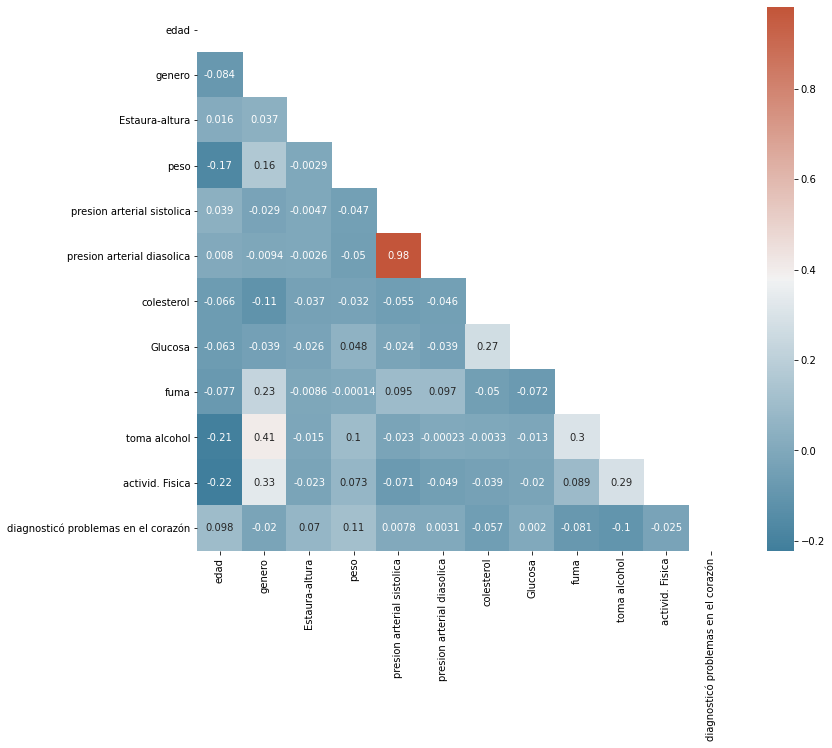

In [4]:
#
# Correlation between different variables
#
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Regresion : https://aiaspirant.com/linear-regression-statsmodels/

In [5]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
lm1 = smf.ols(formula='fuma ~edad+genero+peso', data=df).fit()
lm1.params


Intercept    0.181720
edad        -0.001928
genero       0.113858
peso        -0.000257
dtype: float64

In [9]:
lm1.pvalues

Intercept    5.679848e-02
edad         1.064568e-01
genero       1.428772e-08
peso         2.373879e-01
dtype: float64

In [10]:
 print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   fuma   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     12.29
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           8.16e-08
Time:                        21:13:51   Log-Likelihood:                 8.1698
No. Observations:                 603   AIC:                            -8.340
Df Residuals:                     599   BIC:                             9.268
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1817      0.095      1.909      0.0

# Shap an Feature importance 

In [11]:
pip install shap

In [ ]:
import pycaret

In [12]:
from pycaret.classification import *
model = setup(df, target = 'diagnosticó problemas en el corazón')

,Description,Value
0,session_id,592
1,Target,diagnosticó problemas en el corazón
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(604, 12)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8622,0.5381,0.0000,0.0000,0.0000,-0.0041,-0.0057,0.494
ridge,Ridge Classifier,0.8622,0.0000,0.0000,0.0000,0.0000,-0.0041,-0.0057,0.018
lda,Linear Discriminant Analysis,0.8622,0.5274,0.0000,0.0000,0.0000,-0.0041,-0.0057,0.019
knn,K Neighbors Classifier,0.8599,0.4569,0.0000,0.0000,0.0000,-0.0077,-0.0091,0.124
rf,Random Forest Classifier,0.8599,0.5404,0.0167,0.1000,0.0286,0.0128,0.0191,0.500
et,Extra Trees Classifier,0.8575,0.5568,0.0333,0.1500,0.0536,0.0279,0.0362,0.465
gbc,Gradient Boosting Classifier,0.8432,0.5084,0.0333,0.0750,0.0450,0.0027,0.0011,0.093
ada,Ada Boost Classifier,0.8360,0.5299,0.0533,0.1333,0.0758,0.0180,0.0195,0.106
lightgbm,Light Gradient Boosting Machine,0.8194,0.5290,0.0700,0.1200,0.0876,0.0084,0.0087,0.048
svm,SVM - Linear Kernel,0.7908,0.0000,0.1000,0.0150,0.0261,-0.0109,-0.0087,0.022


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=592, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
rf= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8605,0.5405,0.0000,0.0,0.0000,0.0000,0.0000
1,0.8810,0.4838,0.0000,0.0,0.0000,0.0000,0.0000
2,0.8810,0.3324,0.0000,0.0,0.0000,0.0000,0.0000
3,0.8810,0.8135,0.0000,0.0,0.0000,0.0000,0.0000
4,0.8333,0.3380,0.0000,0.0,0.0000,-0.0426,-0.0638
5,0.8333,0.5231,0.0000,0.0,0.0000,-0.0426,-0.0638
6,0.8571,0.7106,0.0000,0.0,0.0000,0.0000,0.0000
7,0.8333,0.4907,0.0000,0.0,0.0000,-0.0426,-0.0638
8,0.8810,0.6944,0.1667,1.0,0.2857,0.2553,0.3825
9,0.8571,0.4769,0.0000,0.0,0.0000,0.0000,0.0000


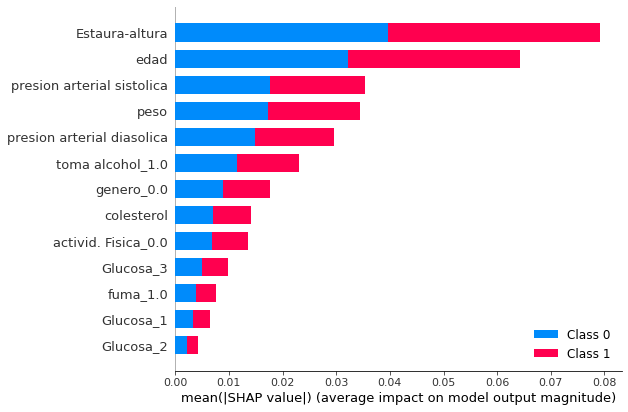

In [15]:
interpret_model(rf)

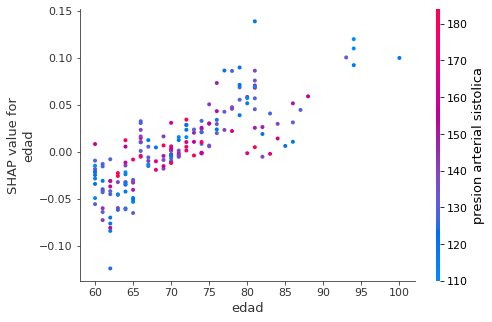

In [16]:
interpret_model(rf, plot = 'correlation')

In [17]:
interpret_model(rf, plot = 'reason', observation = 10)